# CHAPTER 07 군집화

### 01 K-평균 알고리즘 이해

- 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘
- 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

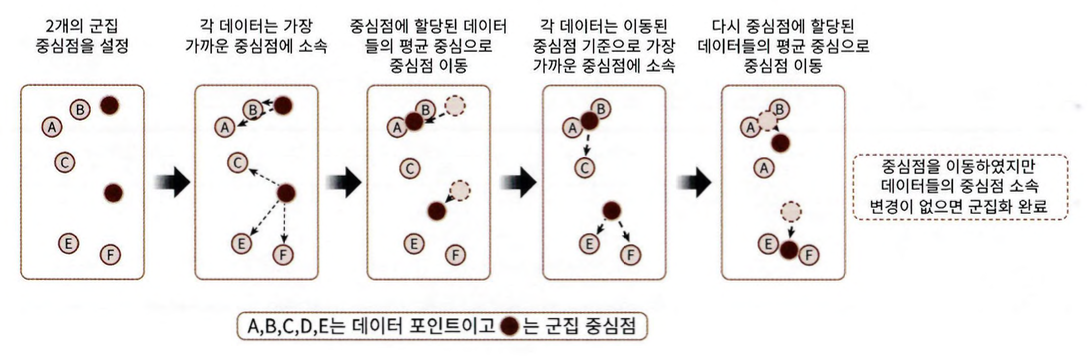

K-평균의 장점
- 일반적인 군집화에서 가장 많이 활용하는 알고리즘
- 알고리즘이 쉽고 간결

K-평균의 단점
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐(이를 위해 PCA로 차원 감소를 적용해야 할 수도 있음)
- 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
- 몇 개의 군집(cluster)을 선택해야 할지 가이드하기 어려움

### 사이킷런 KMeans 클래스 소개

In [1]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=8,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='elkan'             # 경고: 최신 버전에서는 'lloyd' 또는 'elkan' 사용
)

### 중요 파라미터
- KMeans 초기화 파라미터 중 가장 중요한 파라미터는 n_cluster이며, 이는 군집화 개수. 즉 군집 중심점의 개수를 의미
- init는 초기에 군집 중심점의 좌표를 설정할 방식을 말하며, 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정
- max_iter는 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

KMeans는 사이킷런의 비지도학습 클래스와 마찬가지로 fit(데이터 세트) 또는 fit_transform(데이터 세트) 메서드를 이용해 수행하면 됨. 이렇게 수행된 KMeans 객체는 군집화 수행이 완료돼 군집화와 관련된 주요 속성을 알 수 있음. 주요 속성 정보는
- labels_ : 각 데이터 푄트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 할 수 있음.

### K-평균을 이용한 붓꽃 데이터 세트 군집화

In [5]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [9]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [11]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


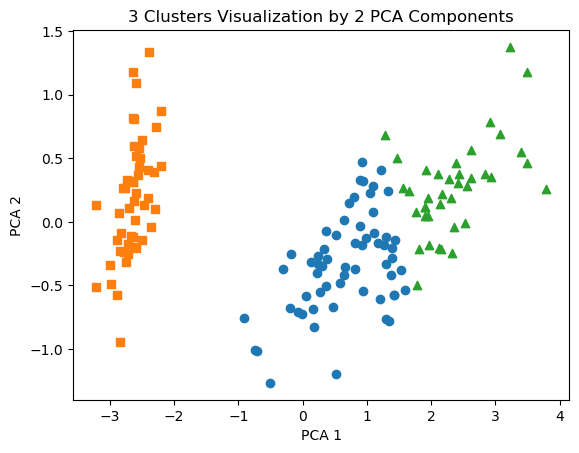

In [15]:
# 군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### 군집화 알고리즘 테스트를 위한 데이터 생성

- 대표적인 군집화용 데이터 생성기 : make_blobs(), make_classification() APi
- 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성
- make_blobs() : 개별 군집의 중심점과 표준 편차 제어 기능이 추가
- make_classification() : 노이즈를 포함한 데이터를 만드는 데 유용하게 사용

### make_blobs()의 호출 파라미터
- n_samples : 생성할 총 데이터 개수. 디폴트는 100개
- n_features : 데이터 피처 개수. 시각화 목표로 할 경우 2개로 설정(x좌표, y좌표)
- centers : int 값
- cluster_std : 생성될 군집 데이터의 표준 편차

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [21]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


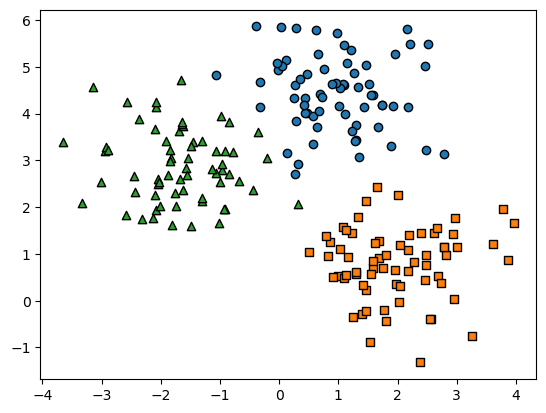

In [23]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker 별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target])
plt.show()

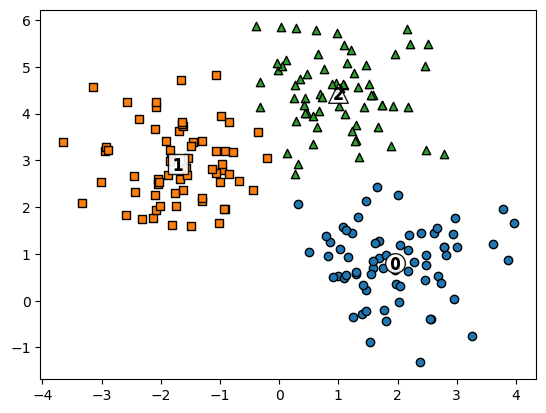

In [25]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클리스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label])

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)

plt.show()

In [27]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


### 02 군집 평가(Cluster Evaluation)

### 실루엣 분석의 개요
- 군집화 평가 방법
- 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지 나타냄
- 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미
- 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것

- 실루엣 계수(silhouette coefficient) : 개별 데이터가 가지는 군집화 지표
- 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지 나타내는 지표

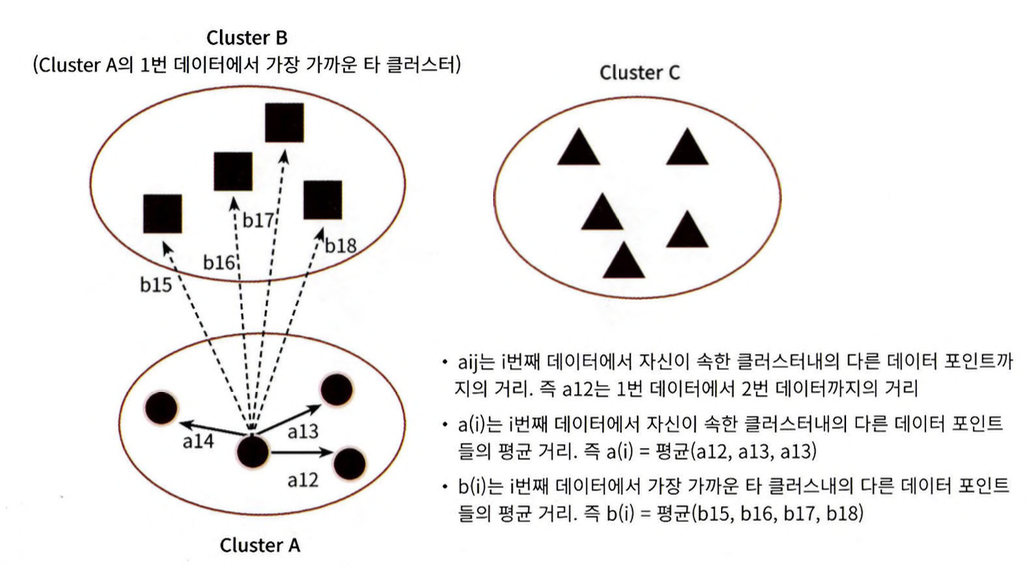

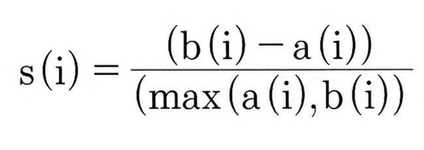

- 실루엣 계수 -1에서 1 사이의 값, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것. 0에 가까울수록 근처의 군집과 가까워진다는 것
- (-) 값은 앙예 다른 군집에 데이터 포인트가 할당됐음을 뜻함

사이킷런은 다음과 같은 메서드를 제공
- sklearn._metrics.sihouette_samples(X, labels, metric='euclidean', **kwds) : 인자로 X feature 데이터 세트와 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환
- sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds) : 인자로 feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터의 실루엣 게수 값을 평균해 반환함. 즉 np.mean(silhouette_samples())임. 일반적으로 이 값이 높을수록 군집화가 어느정도 잘 됐다고 판단 할 수 있음. 하지만 무조건 이 값이 높다고 해서 군집화가 잘 됐다고 판단할 수는 없음.

좋은 군집화가 되려면 다음 기준 조건을 만족
1. 전체 실루엣 계수의 평균값, 즉 사이킷런 silhouette_score() 값은 0~1 사이의 값 가짐. 1에 가까울수록 좋음.
2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값 편차가 크지 않아야 함. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수 평균값에서 크게 벗어나지 않는게 중요. 만약 전체 실루엣 계수의 평균은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아님.

### 붓꽃 데이터 세트를 이용한 군집 평가

sklearn.metrics 모듈의 silhouette_samples()와 silhouettes_score()를 이용

In [32]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [34]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.422323
1    0.797604
2    0.436842
Name: silhouette_coeff, dtype: float64

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def visualize_silhouette(cluster_lists, X_features):
    from sklearn.metrics import silhouette_samples
    import matplotlib.cm as cm
    import numpy as np

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(1, n_cols, figsize=(5*n_cols, 4))
    if n_cols == 1:
        axs = [axs]

    for idx, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters=n_cluster, random_state=10)
        cluster_labels = clusterer.fit_predict(X_features)

        silhouette_avg = silhouette_score(X_features, cluster_labels)
        sample_silhouette_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[idx].set_title("n_clusters = " + str(n_cluster))
        axs[idx].set_xlim([-0.1, 1])
        axs[idx].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])

        for i in range(n_cluster):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[idx].fill_betweenx(np.arange(y_lower, y_upper),
                                   0, ith_cluster_silhouette_values,
                                   facecolor=color, edgecolor=color, alpha=0.7)

            axs[idx].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[idx].set_xlabel("Silhouette coefficient values")
        axs[idx].set_ylabel("Cluster label")
        axs[idx].axvline(x=silhouette_avg, color="red", linestyle="--")
        axs[idx].set_yticks([])
        axs[idx].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

    plt.tight_layout()
    plt.show()

In [49]:
iris = load_iris()
X_features = scale(iris.data)

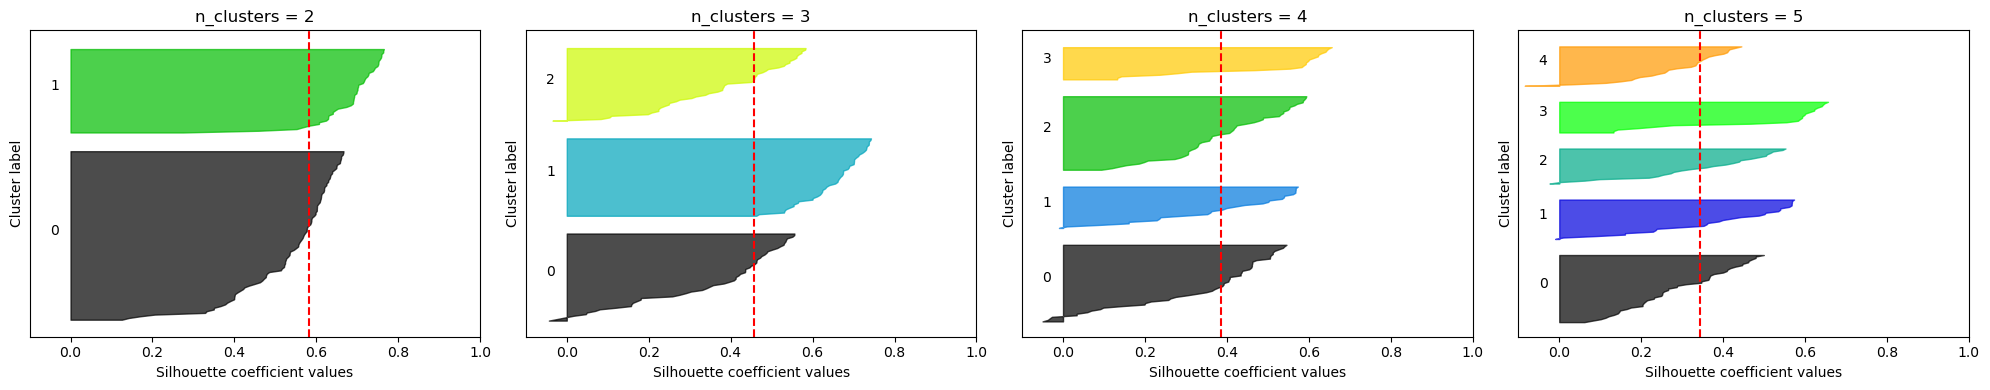

In [51]:
visualize_silhouette([2,3,4,5], X_features)

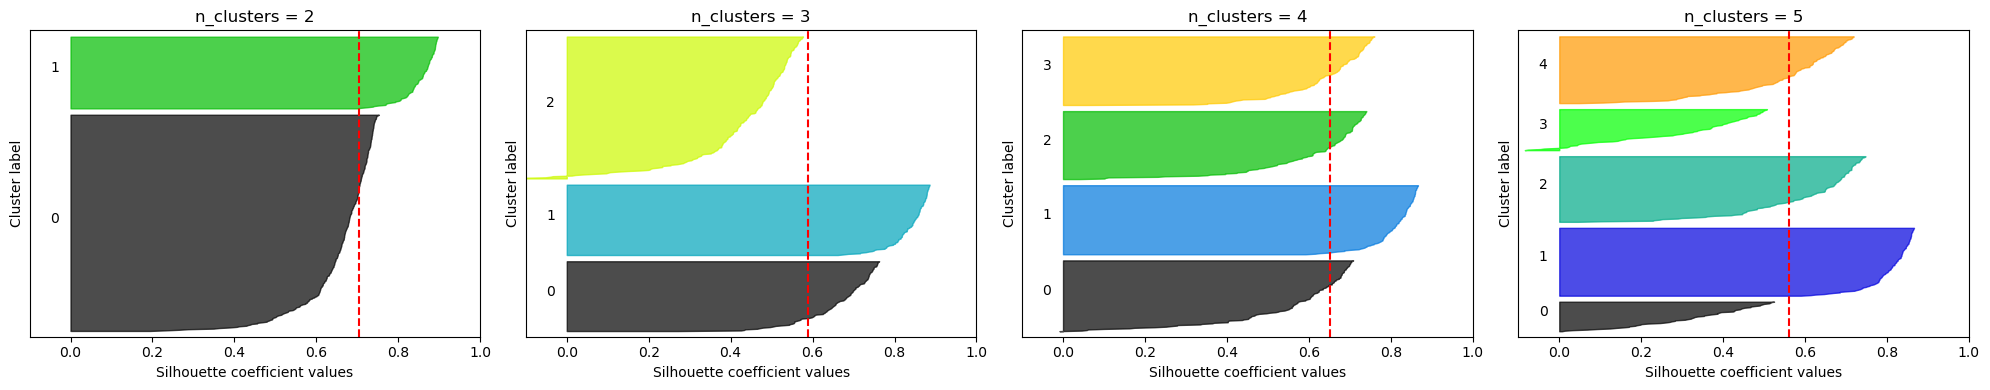

In [53]:
# makte_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

- 군집 개수를 2개로 하는 것이 가장 좋음
- 3개의 경우 평균 실루엣 계수 값도 2개보다 작을뿐더러 1번 군집과 다른 0번, 2번 군집과의 실루엣 계수의 편차가 큼